In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from modules.Utils.utils import loadFromDB

In [2]:
SYMBOL= 'BTC'
df = loadFromDB(SYMBOL,'1h').iloc[-400:]
df.head()

,Open,High,Low,Close,Volume,Timestamp
Date,,,,,,
2022-10-07 16:00:00,19577.34,19606.52,19320.00,19404.50,18264.92281,1665158400
2022-10-07 17:00:00,19404.50,19488.00,19365.76,19418.05,10289.76641,1665162000
2022-10-07 18:00:00,19418.05,19479.10,19375.16,19456.63,8481.54439,1665165600
2022-10-07 19:00:00,19456.63,19485.91,19410.01,19459.32,8680.10304,1665169200
2022-10-07 20:00:00,19459.32,19570.36,19440.73,19548.80,6764.61601,1665172800


# Pure Pupil Volatility Indicator (PPVI)

In [7]:
df['PPVI_high'] = df.High.rolling(3).std().rolling(3).max()
df['PPVI_low'] = df.Low.rolling(3).std().rolling(3).max()
df['SMA_3'] = df.Close.rolling(3).mean()

df['PPVI_upper'] = df['SMA_3'] + 2*df['PPVI_high']
df['PPVI_lower'] = df['SMA_3'] - 2*df['PPVI_low']

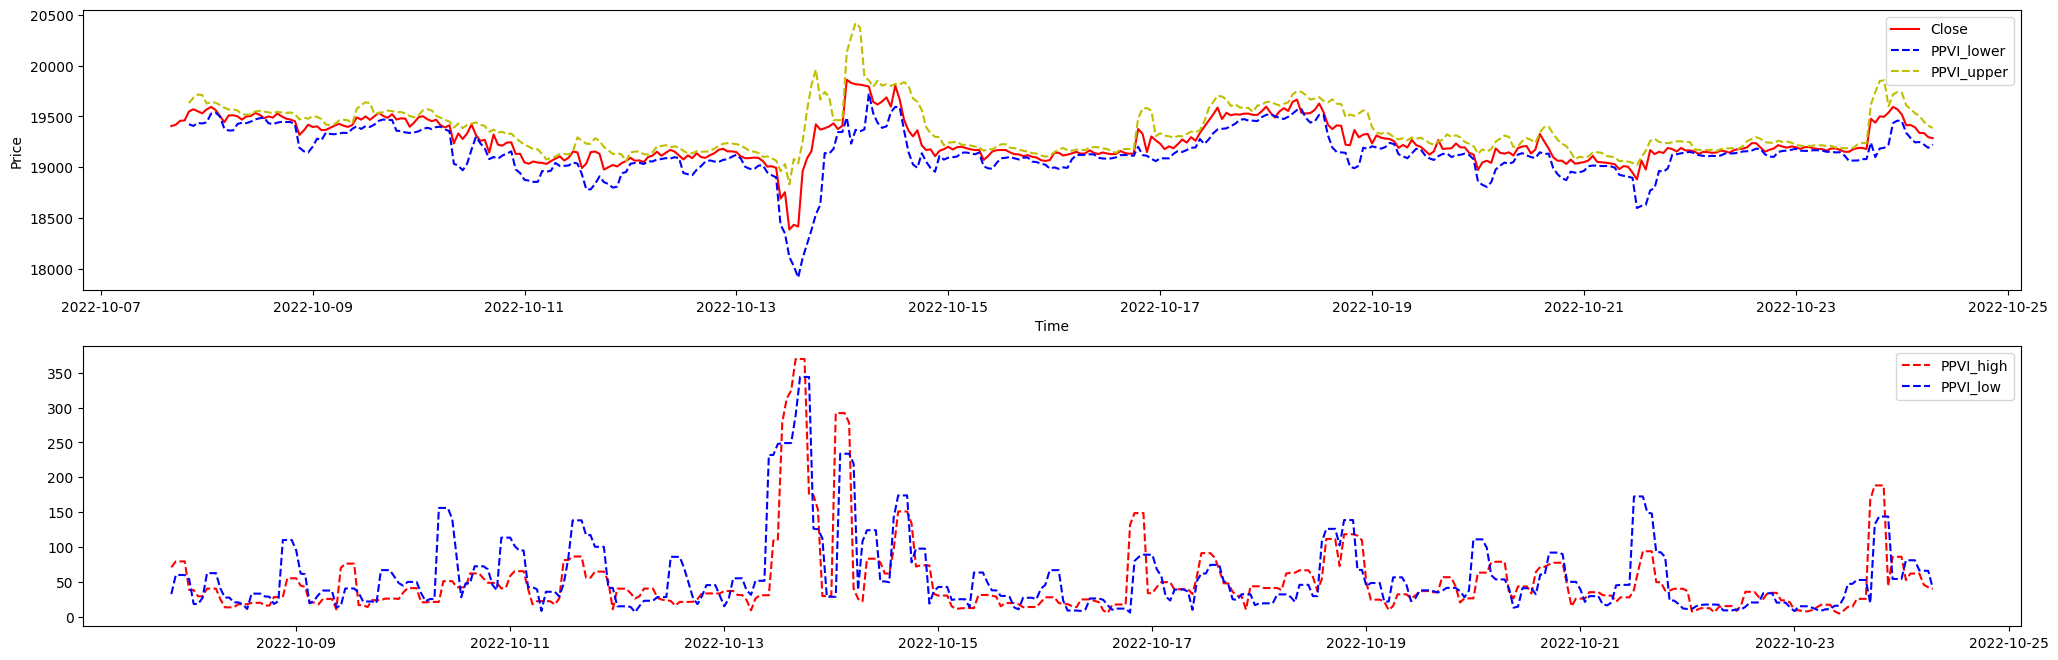

In [8]:
fig, ax = plt.subplots(2,1,figsize=(25,8))

ax[0].plot(df['Close'], 'r-', label='Close')
ax[0].plot(df['PPVI_lower'], 'b--', label='PPVI_lower')
ax[0].plot(df['PPVI_upper'], 'y--', label='PPVI_upper')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Price')
ax[0].legend(loc='best')

ax[1].plot(df['PPVI_high'], 'r--', label='PPVI_high')
ax[1].plot(df['PPVI_low'], 'b--', label='PPVI_low')
ax[1].legend(loc='best')